In [4]:
from IPython.display import Audio
import numpy as np

In [1]:
def Karplus_Strong(freq, dur, fs, stretch_factor, b):
        
        # Genera el N (o L) de Karplus-Strong para la frecuencia de la nota y fs
        N = int(np.round(fs/freq - 1/(2 * stretch_factor), 0))
        
        # Crea vector resultante con la duración correspondiente
        samples = np.zeros(int(np.round(fs * dur, 0)))
        
        # Genera ruido inicial con -1 y 1.
        samples[ : N] = (2 * np.random.randint(0, 2, N) - 1).astype(float)
        
        k = np.zeros(N)
        r = np.random.binomial(1, 1 / stretch_factor, samples.size).astype(bool)
        
        for i in range(N, N * (1 + samples.size//N), N):
            idx = r[i : i + N]
            k = k[ : idx.size]
            
            t1 = samples[i - N : i - N + k.size]
            if i == N: t2 = np.concatenate(([samples[i - N - 1]], samples[i - N : i - N - 1 + k.size]))
            else: t2 =  samples[i - N - 1 : i - N - 1 + k.size]
                
            k[~idx] = t1[~idx]
            k[idx] = (t1 + t2)[idx]/2
            
            samples[i : i + N] = b * k
            
        return samples

In [ ]:
def Karplus_Strong_2(freq, dur, fs, stretch_factor, b):
        
        # Genera el N (o L) de Karplus-Strong para la frecuencia de la nota y fs
        N = int(np.round(fs/freq - .5, 0))
        
        # Crea vector resultante con la duración correspondiente
        samples = np.zeros(int(np.round(fs * dur, 0)))
        
        # Genera ruido inicial con -1 y 1.
        wavetable = (2 * np.random.randint(0, 2, N) - 1).astype(float)
        
        # Actualiza la matriz de medias en caso de que N sea mayor a su tamaño actual
        self._update_mean_matrix(N, b, stretch_factor)
        
        # Itera hasta haber generado la cantidad de muestras necesarias
        for i in range(0, samples.size + N - samples.size%N, N):
            
            # Guarda el valor de la última posición del arreglo de sonido
            inival = wavetable[-1]
            
            #stretchs = np.random.binomial(1, 1 / stretch_factor, N)
            #idx = stretchs != 0
            #wavetable[idx] = wavetable.dot(self.mean_matrix[:N, : N][:, idx])
            
            # Promedia de a dos el arreglo de ruido
            wavetable = wavetable.dot(self.mean_matrix[:N, : N])
            
            #expos = np.argwhere(idx).reshape(-1)
            #if expos.size: difs = np.append(expos[0], expos[1:] - expos[:-1] - 1)
            #else: difs = 0
            
            #wavetable[idx] *= 2**difs
            #if np.any(np.isinf(wavetable[idx])): print(wavetable)
            #k = np.count_nonzero(~idx)
            #wavetable[idx] *= 2.0**()
            #wavetable[idx] += inival * (b / 2)**(np.arange(1, N + 1)[idx] - difs)
            
            # Suma el valor promediado correspondiente al último valor del vector guardado previamente
            wavetable += inival * b**(i + 1) * (.5)**np.arange(1, N + 1)
            wavetable *= b
            
            # Guarda las muestras generadas
            samples[i : i + N] = wavetable[ : min(N, samples.size - i)]
        
        return samples
    
    
 # Actualiza la matriz de medias
def _update_mean_matrix(self, N, b, stretch = 1):

        dif = 0
        
        # Si no existe la matriz, la crea
        if not hasattr(self, 'mean_matrix'): 
            self.mean_matrix, dif = np.zeros((N, N)), N
        
        # Si existe y su tamaño es menor a N, rellena hasta N
        elif self.mean_matrix.shape[0] < N:
            dif = N - self.mean_matrix.shape[0]
            self.mean_matrix = np.append(self.mean_matrix, np.zeros((dif, N - dif)), axis = 0)
            self.mean_matrix = np.append(self.mean_matrix, np.zeros((N, dif)), axis = 1)

        # Completa las posiciones agregadas con su correspondiente valor
        for i in range(N - dif, N):
            if i: self.mean_matrix[1 : i + 1, i] = self.mean_matrix[: i, i - 1]
            self.mean_matrix[0, i] = 1 * (.5)**(i+1)
            

In [9]:
Audio(Karplus_Strong(440, 12, 8000, 1, 1), rate = 8000)

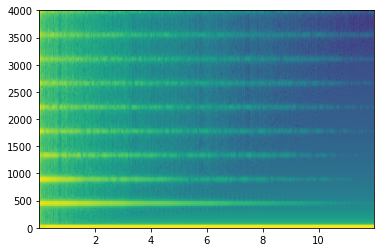

In [15]:
import matplotlib.pyplot as plt

plt.specgram(Karplus_Strong(440, 12, 8000, 15, 1), Fs = 8000);